In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)

In [5]:
#drop base_egg_steps
#binning experience growth, capture rate
pokemon = pd.read_csv('pokemon_bin_1.csv')
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,capture_rate_bin,experience_growth_bin
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,0,0-0.5,Below 1.1M
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,0,0-0.5,Below 1.1M
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,Venusaur,122,120,80,grass,poison,100.0,0,0-0.5,Below 1.1M
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,Charmander,60,50,65,fire,none,8.5,0,0-0.5,Below 1.1M
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,Charmeleon,80,65,80,fire,none,19.0,0,0-0.5,Below 1.1M


In [6]:
pokemon.isnull().sum()

against_bug              0
against_dark             0
against_dragon           0
against_electric         0
against_fairy            0
against_fight            0
against_fire             0
against_flying           0
against_ghost            0
against_grass            0
against_ground           0
against_ice              0
against_normal           0
against_poison           0
against_psychic          0
against_rock             0
against_steel            0
against_water            0
attack                   0
base_happiness           0
base_total               0
defense                  0
height_m                 0
hp                       0
name                     0
sp_attack                0
sp_defense               0
speed                    0
type1                    0
type2                    0
weight_kg                0
is_legendary             0
capture_rate_bin         0
experience_growth_bin    0
dtype: int64

In [7]:
pokemon = pokemon.set_index('name')
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,capture_rate_bin,experience_growth_bin
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,65,65,45,grass,poison,6.9,0,0-0.5,Below 1.1M
Ivysaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,80,80,60,grass,poison,13.0,0,0-0.5,Below 1.1M
Venusaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,122,120,80,grass,poison,100.0,0,0-0.5,Below 1.1M
Charmander,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,60,50,65,fire,none,8.5,0,0-0.5,Below 1.1M
Charmeleon,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,80,65,80,fire,none,19.0,0,0-0.5,Below 1.1M


In [8]:
df = pd.get_dummies(pokemon)

In [9]:
df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water,capture_rate_bin_0-0.5,capture_rate_bin_0.5-1,capture_rate_bin_1-1.5,capture_rate_bin_1.5-2.0,capture_rate_bin_2.0-2.5,capture_rate_bin_2.5+,experience_growth_bin_Above 1.1M,experience_growth_bin_Below 1.1M
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,70,318,49,0.7,45,65,65,45,6.9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Ivysaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,70,405,63,1.0,60,80,80,60,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Venusaur,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,70,625,123,2.0,80,122,120,80,100.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
Charmander,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,70,309,43,0.6,39,60,50,65,8.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Charmeleon,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,70,405,58,1.1,58,80,65,80,19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Celesteela,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,0,570,103,9.2,97,107,101,61,999.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
Kartana,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,0,570,131,0.3,59,59,31,109,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
Guzzlord,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,0,570,53,5.5,223,97,53,43,888.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [30]:
X, y = df.drop(['is_legendary','is_legendary','against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'height_m', 'weight_kg', 'capture_rate_bin_0-0.5', 'capture_rate_bin_0.5-1',
       'capture_rate_bin_1-1.5', 'capture_rate_bin_1.5-2.0',
       'capture_rate_bin_2.0-2.5', 'capture_rate_bin_2.5+',
       'experience_growth_bin_Above 1.1M', 'experience_growth_bin_Below 1.1M','base_happiness', 'type2_electric', 'type2_fighting', 'type2_flying', 'type2_ground' ], axis = 1), df['is_legendary']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3, stratify = y)
y.value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [31]:
len(X.columns)

40

### Uploading Inference

In [32]:
inf_test = pd.read_csv('pokemon_inf.csv')

In [33]:
inf_test.head(3)

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,base_total,legendary
0,Grookey,Grass,NaN,50,65,50,40,40,65,310,0
1,Thwackey,Grass,NaN,70,85,70,55,60,80,420,0
2,Rillaboom,Grass,NaN,100,125,90,60,70,85,530,0


In [34]:
inf_test.dtypes

name          object
type1         object
type2         object
hp             int64
attack         int64
defense        int64
sp_attack      int64
sp_defense     int64
speed          int64
base_total     int64
legendary      int64
dtype: object

In [35]:
inf_test.isnull().sum()

name           0
type1          0
type2         53
hp             0
attack         0
defense        0
sp_attack      0
sp_defense     0
speed          0
base_total     0
legendary      0
dtype: int64

In [36]:
inf_test['type2'] = inf_test['type2'].fillna('none')

In [37]:
inf_test['type1'] = inf_test['type1'].str.lower()

In [38]:
inf_test['type2'] = inf_test['type2'].str.lower()

In [39]:
inf_test = inf_test.set_index('name')
inf_test.head()

,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,base_total,legendary
name,,,,,,,,,,
Grookey,grass,none,50,65,50,40,40,65,310,0
Thwackey,grass,none,70,85,70,55,60,80,420,0
Rillaboom,grass,none,100,125,90,60,70,85,530,0
Scorbunny,fire,none,50,71,40,40,40,69,310,0
Raboot,fire,none,65,86,60,55,60,94,420,0


In [40]:
inf_test_dum = pd.get_dummies(inf_test)

In [41]:
inf_X, inf_y = inf_test_dum.drop(['legendary'], axis = 1), inf_test_dum['legendary']

In [42]:
len(inf_X.columns)

40

# Oversampling

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'not_legendary'), Text(1, 0, 'legendary')]

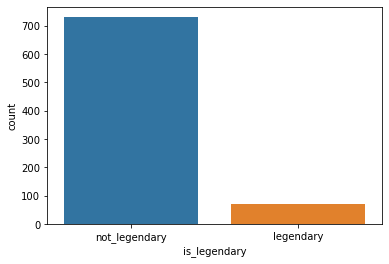

In [44]:
g = sns.countplot(df['is_legendary'])
g.set_xticklabels(['not_legendary','legendary'])


In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 0.8,random_state=42,k_neighbors=20)
x_train_res, y_train_res = sm.fit_resample(train_X, train_y)

In [46]:
y_train_res.value_counts()

0    511
1    408
Name: is_legendary, dtype: int64

# Traning Models

In [47]:
#define functions for classifiers

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
def classifier(model):
    
    clf = model
    clf.fit(x_train_res, y_train_res)
    y_pred = clf.predict(inf_X)
    
    kf=KFold(n_splits=5)
    cv_score=cross_val_score(clf,x_train_res,y_train_res,cv=kf)
    acc_score = accuracy_score(inf_y, y_pred)
    
    print("Cross Validation Scores are {}".format(cv_score))
    print("Average Cross Validation score :{}".format(cv_score.mean()))
    #print(confusion_matrix(test_y, y_pred))
    print(classification_report(inf_y, y_pred))
    print("accuracy: ", acc_score)
    return clf, acc_score, cv_score.mean()

In [48]:
#define functions for comparing RMSE

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

def compare_RMSE(model,x_train_res,y_train_res,inf_X,inf_y):
    
    # test
    test_rmse = mean_squared_error(inf_y, model.predict(inf_X), squared=False)
    print(f"Test set RMSE:", test_rmse)

    # cv
    MSE_CV_scores = - cross_val_score(model, x_train_res, y_train_res, cv=10, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print(f"CV RMSE:", RMSE_CV)

    # train
    RMSE_train = (mean_squared_error(y_train_res, model.predict(x_train_res)))**(1/2)
    print(f"Training set RMSE:",RMSE_train)

In [49]:
#define functions for confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

def draw_confusion_matrix(model,inf_X,inf_y):

    cnf_matrix = metrics.confusion_matrix(inf_y, model.predict(inf_X))
    # create heatmap
    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### logistic regression


In [50]:
#logistic regression

logistic_regression, acc_log_reg,log_mean_cv_score = classifier(LogisticRegression(max_iter = 1000))

Cross Validation Scores are [0.91847826 0.95652174 0.94565217 0.98369565 0.99453552]
Average Cross Validation score :0.959776669042528
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        82
           1       0.00      0.00      0.00        17

    accuracy                           0.83        99
   macro avg       0.41      0.50      0.45        99
weighted avg       0.69      0.83      0.75        99

accuracy:  0.8282828282828283


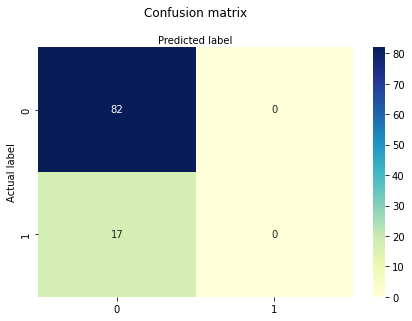

In [51]:
draw_confusion_matrix(logistic_regression,inf_X,inf_y)

In [56]:
roc_curve(inf_y, logistic_regression.predict(inf_X))

(array([0., 1.]), array([0., 1.]), array([1, 0]))

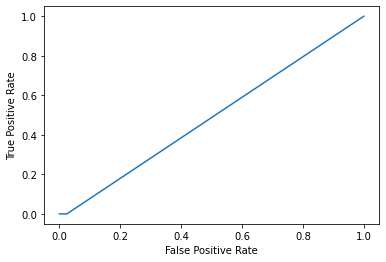

In [57]:
y_pred_proba = logistic_regression.predict_proba(inf_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(inf_y,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print('roc score:',roc_auc_score(inf_y,y_pred_proba))


roc score: 0.4878048780487805


In [59]:
compare_RMSE(logistic_regression,x_train_res, y_train_res,inf_X,inf_y)

Test set RMSE: 0.41438770700537403
CV RMSE: 0.21621996904066143
Training set RMSE: 0.16820113355007427


### random forest


In [60]:
#random forest
random_forest, acc_random_forest,rf_mean_cv_score = classifier(RandomForestClassifier(n_estimators = 1000, max_depth = 5,  max_features = 10))

Cross Validation Scores are [0.91847826 0.95652174 0.95652174 0.97826087 0.99453552]
Average Cross Validation score :0.9608636255642671
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        82
           1       0.00      0.00      0.00        17

    accuracy                           0.83        99
   macro avg       0.41      0.50      0.45        99
weighted avg       0.69      0.83      0.75        99

accuracy:  0.8282828282828283


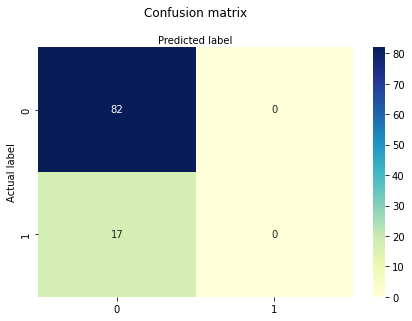

In [61]:
draw_confusion_matrix(random_forest,inf_X,inf_y)

In [62]:
compare_RMSE(random_forest,x_train_res, y_train_res,inf_X,inf_y)

Test set RMSE: 0.41438770700537403
CV RMSE: 0.19233396858229784
Training set RMSE: 0.16160242189977778


In [63]:
importances = random_forest.feature_importances_
std = np.std([random_forest.feature_importances_ for tree in random_forest.estimators_], axis=0)

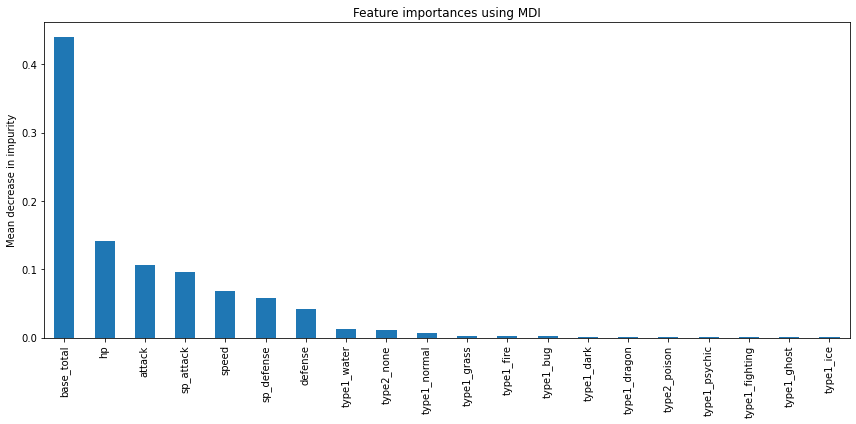

In [64]:
forest_importances = pd.Series(importances, index=train_X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
forest_importances = forest_importances[:20]
fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std[:20], ax=ax,figsize=(12, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SGD

In [65]:
#SGD
SGD, acc_sgd,SGD_mean_cv_score = classifier(SGDClassifier())

Cross Validation Scores are [0.40217391 0.17391304 0.10869565 0.95108696 0.77595628]
Average Cross Validation score :0.4823651698740793
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        82
           1       0.00      0.00      0.00        17

    accuracy                           0.83        99
   macro avg       0.41      0.50      0.45        99
weighted avg       0.69      0.83      0.75        99

accuracy:  0.8282828282828283


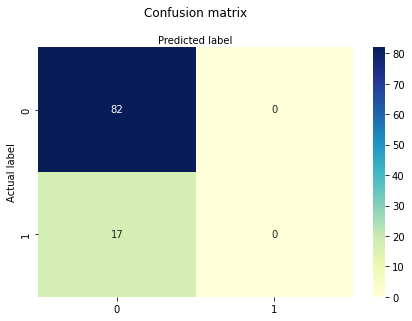

In [66]:
draw_confusion_matrix(SGD,inf_X,inf_y)

In [67]:
# Evaluate the model by comparing three RMSE's.
compare_RMSE(SGD,x_train_res, y_train_res,inf_X,inf_y)

Test set RMSE: 0.41438770700537403
CV RMSE: 0.6950614130369895
Training set RMSE: 0.5873160583020861


### decision tree

In [687]:
#decision tree
decision_tree, acc_decision_tree, decision_tree_mean_cv_score= classifier(DecisionTreeClassifier())

Cross Validation Scores are [0.9673913  0.95108696 0.98369565 0.96195652 0.98360656]
Average Cross Validation score :0.9695473984319316
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       220
           1       0.77      0.81      0.79        21

    accuracy                           0.96       241
   macro avg       0.88      0.89      0.89       241
weighted avg       0.96      0.96      0.96       241

accuracy:  0.9626556016597511


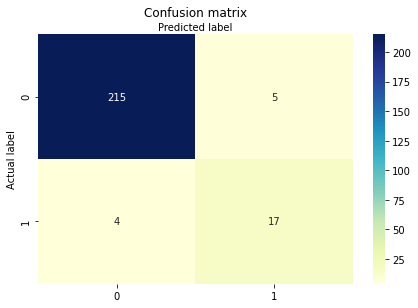

In [688]:
draw_confusion_matrix(decision_tree,test_X,test_y)

In [689]:
compare_RMSE(decision_tree,x_train_res, y_train_res,test_X,test_y)

Test set RMSE: 0.19324698792024925
CV RMSE: 0.16825173958644607
Training set RMSE: 0.0


### SVC

In [690]:
#Linear SVC
linear_SVC, acc_linear_svc,linear_SVC_mean_cv_score = classifier(LinearSVC(max_iter = 100))

Cross Validation Scores are [0.9076087  0.94565217 0.98369565 0.09782609 0.68306011]
Average Cross Validation score :0.723568543597054
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       220
           1       1.00      0.14      0.25        21

    accuracy                           0.93       241
   macro avg       0.96      0.57      0.61       241
weighted avg       0.93      0.93      0.90       241

accuracy:  0.9253112033195021


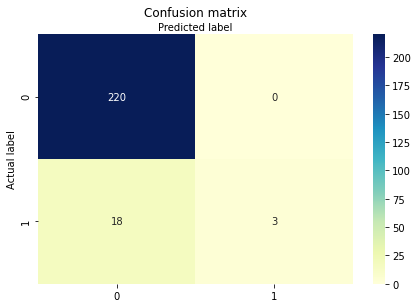

In [691]:
draw_confusion_matrix(linear_SVC,test_X,test_y)

In [692]:
compare_RMSE(linear_SVC,x_train_res, y_train_res,test_X,test_y)

Test set RMSE: 0.27329251120456616
CV RMSE: 0.437465444679987
Training set RMSE: 0.6258834887246241


### GaussianNB


In [693]:
#GaussianNB
gaussian_NB, acc_gnb,gaussian_NB_mean_cv_score = classifier(GaussianNB())

Cross Validation Scores are [0.88043478 0.96195652 0.92934783 0.97826087 1.        ]
Average Cross Validation score :0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       220
           1       0.75      0.57      0.65        21

    accuracy                           0.95       241
   macro avg       0.85      0.78      0.81       241
weighted avg       0.94      0.95      0.94       241

accuracy:  0.946058091286307


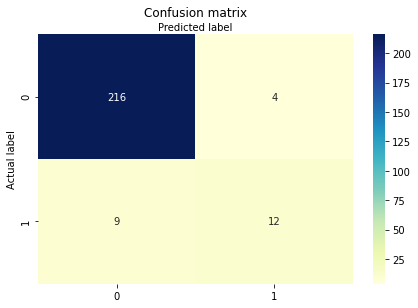

In [694]:
draw_confusion_matrix(gaussian_NB,test_X,test_y)

In [695]:
compare_RMSE(gaussian_NB,x_train_res, y_train_res,test_X,test_y)

Test set RMSE: 0.23225397459180963
CV RMSE: 0.2308349165952615
Training set RMSE: 0.2033452549470157


### KNeighbors Classifier


In [696]:
#KNeighbors Classifier
kneighbors, acc_knn,kneighbors_mean_cv_score = classifier(KNeighborsClassifier())

Cross Validation Scores are [0.95108696 0.89130435 0.95652174 0.98369565 0.98360656]
Average Cross Validation score :0.9532430506058447
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       220
           1       0.64      1.00      0.78        21

    accuracy                           0.95       241
   macro avg       0.82      0.97      0.87       241
weighted avg       0.97      0.95      0.96       241

accuracy:  0.950207468879668


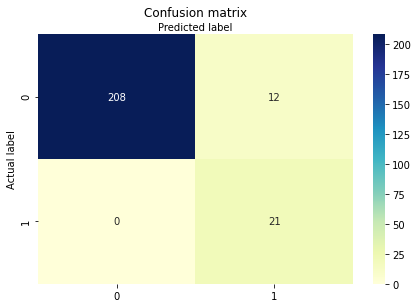

In [697]:
draw_confusion_matrix(kneighbors,test_X,test_y)

In [698]:
compare_RMSE(kneighbors,x_train_res, y_train_res,test_X,test_y)

Test set RMSE: 0.22314240099168053
CV RMSE: 0.21371958980722242
Training set RMSE: 0.1923453549794081


### Perceptron


In [699]:
#Perceptron
perceptron, acc_perceptron,perceptron_mean_cv_score = classifier(Perceptron())

Cross Validation Scores are [0.53804348 0.85869565 0.71195652 0.69565217 0.91803279]
Average Cross Validation score :0.7444761225944405
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       220
           1       0.31      0.71      0.43        21

    accuracy                           0.84       241
   macro avg       0.64      0.78      0.67       241
weighted avg       0.91      0.84      0.86       241

accuracy:  0.8381742738589212


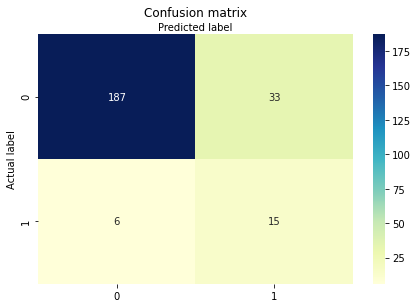

In [700]:
draw_confusion_matrix(perceptron,test_X,test_y)

In [701]:
compare_RMSE(perceptron,x_train_res, y_train_res,test_X,test_y)

Test set RMSE: 0.40227568425282534
CV RMSE: 0.4362761018849961
Training set RMSE: 0.4066905098940314


### All Model Accuracy

In [702]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Gaussain Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Descent'],
    
    'Score': [acc_log_reg, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd],
    
     'Average CV score': [log_mean_cv_score, linear_SVC_mean_cv_score, 
              kneighbors_mean_cv_score,  decision_tree_mean_cv_score, rf_mean_cv_score, gaussian_NB_mean_cv_score, 
              perceptron_mean_cv_score, SGD_mean_cv_score]   
    
    })

models.sort_values(by='Score', ascending=False)

,Model,Score,Average CV score
0,Logistic Regression,0.983402,0.970652
4,Random Forest,0.979253,0.977156
3,Decision Tree,0.962656,0.969547
2,KNN,0.950207,0.953243
5,Gaussain Naive Bayes,0.946058,0.950000
1,Linear SVC,0.925311,0.723569
7,Stochastic Gradient Descent,0.854772,0.737420
6,Perceptron,0.838174,0.744476
